In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the Euler Maruyama function before and after change of measure

In [41]:
def euler(alpha, beta, min_t, max_t, dt, X0):
    t = np.arange(min_t, max_t + dt, dt)
    X = np.zeros(len(t))
    Bt = np.zeros(len(t))  # Brownian motion increments
    X[0] = X0
    for i in range(1, len(t)):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
        Bt[i] = Bt[i-1] + dW
        X[i] = X[i-1] + alpha * dt + beta * dW
       
    return t, X, Bt

In [42]:
def cof_euler(alpha, beta, min_t, max_t, dt, X0):
    t = np.arange(min_t, max_t + dt, dt)
    X = np.zeros(len(t))
    Bt = np.zeros(len(t))  # Brownian motion increments
    X[0] = X0
    for i in range(1, len(t)):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
        Bt[i] = Bt[i-1] - alpha/beta * dt + dW
        X[i] = X[i-1] + beta * dW
       
    return t, X, Bt

Define initial variables

In [43]:
min_t = 0
max_t = 1
dt = 1/1000
X0 = 0.0

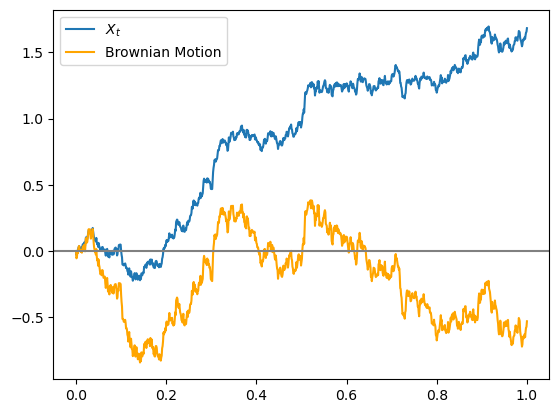

In [44]:
np.random.seed(100)
t, X, Bt = euler(2, 0.6, min_t, max_t, dt, X0)
plt.figure(1)
plt.plot(t, X, label='$X_t$')
plt.plot(t, Bt, color='orange', label='Brownian Motion')
plt.axhline(0, color='grey')
plt.legend()
plt.show()

In the new measure we have:\

$W_t = B_t - int_{0}^{t} A_s ds$ \
$dB_t = A_t dt + dW_t$


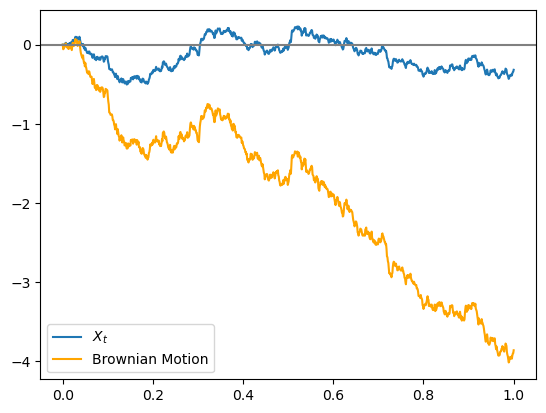

In [45]:
np.random.seed(100)
BtcXX, X, Bt = cof_euler(2, 0.6, min_t, max_t, dt, X0)
plt.figure(1)
plt.plot(t, X, label='$X_t$')
plt.plot(t, Bt, color='orange', label='Brownian Motion')
plt.axhline(0, color='grey')
plt.legend()
plt.show()